In [ ]:
#from google.colab import drive

In [ ]:
#drive.mount("/content/drive")

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GPU_CA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GPU_CA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**READING THE CSV FILE**

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/Dataset-SA.csv")
df = pd.read_csv('C:/Users/GPU_CA/Downloads/Priya/Dataset-SA.csv')
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


**COUNTING THE NULL VALUES**

In [ ]:

df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

**REMOVING THE COLUMNS CONTAINING IRRELEVANT VALUES**

In [ ]:

df.drop(['product_name', 'product_price', 'Rate', 'Review'], axis=1, inplace=True)

In [ ]:
df

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,positive
1,best budget 2 fit cooler nice cooling,positive
2,the quality is good but the power of air is de...,positive
3,very bad product its a only a fan,negative
4,ok ok product,neutral
...,...,...
205047,good product,positive
205048,nice,positive
205049,very nice and fast delivery,positive
205050,awesome product,positive


In [ ]:
df['Summary'].dtype

dtype('O')

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from textblob import Word
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GPU_CA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,positive
1,best budget 2 fit cooler nice cooling,positive
2,the quality is good but the power of air is de...,positive
3,very bad product its a only a fan,negative
4,ok ok product,neutral


In [ ]:
#Summary of the dataset
df.describe()

,Summary,Sentiment
count,205041,205052
unique,92923,3
top,good,positive
freq,17430,166581


In [ ]:
#sentiment count
df['Sentiment'].value_counts()

Sentiment
positive    166581
negative     28232
neutral      10239
Name: count, dtype: int64

In [ ]:
pos = df[df["Sentiment"]=="positive"][:166581]
neg = df[df["Sentiment"]=="negative"][:28232]
neu = df[df["Sentiment"]=="neutral"][:10239]
dff = pd.concat([pos, neg , neu])
dff.shape

(205052, 2)

In [ ]:
Summary=df['Summary']

In [ ]:
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GPU_CA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**DATA PREPROCESSING**

In [ ]:
## cleaning the Summary

def cleantext(summary):
    if not isinstance(summary, str):
        summary = str(summary)
    # ... rest of the function
    # removing the "\"
    summary = re.sub("'\''","",summary)
    # removing special symbols
    summary = re.sub(r"https\S+|www\S+https\S+", '',summary, flags=re.MULTILINE)
    summary = re.sub("[^a-zA-Z]"," ",summary)
    # removing the whitespaces
    summary = ' '.join(summary.split())
    # convert text to lowercase
    summary = summary.lower()
    return summary

df['Summary'] = df['Summary'].apply(lambda x:cleantext(x))
df['Summary'].iloc[1]

'best budget fit cooler nice cooling'

In [ ]:
print(Summary.head())

0    great cooler excellent air flow and for this p...
1                best budget 2 fit cooler nice cooling
2    the quality is good but the power of air is de...
3                    very bad product its a only a fan
4                                        ok ok product
Name: Summary, dtype: object


In [ ]:
x = df['Summary']
sentnces = [Summary.split() for Summary in x]

In [ ]:
#stemming Approach

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):

    stemmed_sentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence+=stem
        stemmed_sentence+=" "

    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence

df['Summary'] = df['Summary'].apply(lambda text:stemming(text))
df['Summary'].iloc[1]

'best budget fit cooler nice cool'

In [ ]:
df.head(10)

,Summary,Sentiment
0,great cooler excel air flow and for thi price ...,positive
1,best budget fit cooler nice cool,positive
2,the qualiti is good but the power of air is de...,positive
3,veri bad product it a onli a fan,negative
4,ok ok product,neutral
5,the cooler is realli fantast and provid good a...,positive
6,veri good product,positive
7,veri nice,positive
8,veri bad cooler,negative
9,veri good,positive


**Labelling**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply label encoding to the 'Sentiment' column and create a new column 'sentiment_encoded'
df['sentiment_encoded'] = encoder.fit_transform(df['Sentiment'])



In [ ]:
X = df['Summary']
sentences = [Summary.split() for Summary in X]

In [ ]:
df.dtypes

Summary              object
Sentiment            object
sentiment_encoded     int32
dtype: object

**count plot for postive, negtive and neutral sentiments**

<Axes: xlabel='count', ylabel='Sentiment'>

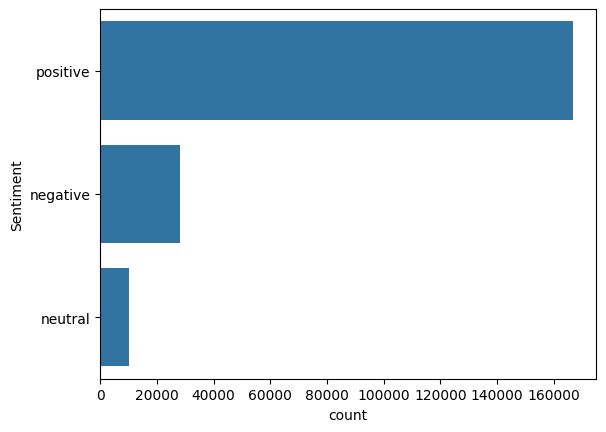

In [ ]:
#count plot for postive, negtive and neutral sentiments
sns.countplot(df["Sentiment"])

In [ ]:
# Check the length of the 'words' string
#print(len(word))

# Check the contents of the 'positive' DataFrame
print(pos.head())

                                             Summary Sentiment
0  great cooler excellent air flow and for this p...  positive
1              best budget 2 fit cooler nice cooling  positive
2  the quality is good but the power of air is de...  positive
5  the cooler is really fantastic and provides go...  positive
6                                  very good product  positive


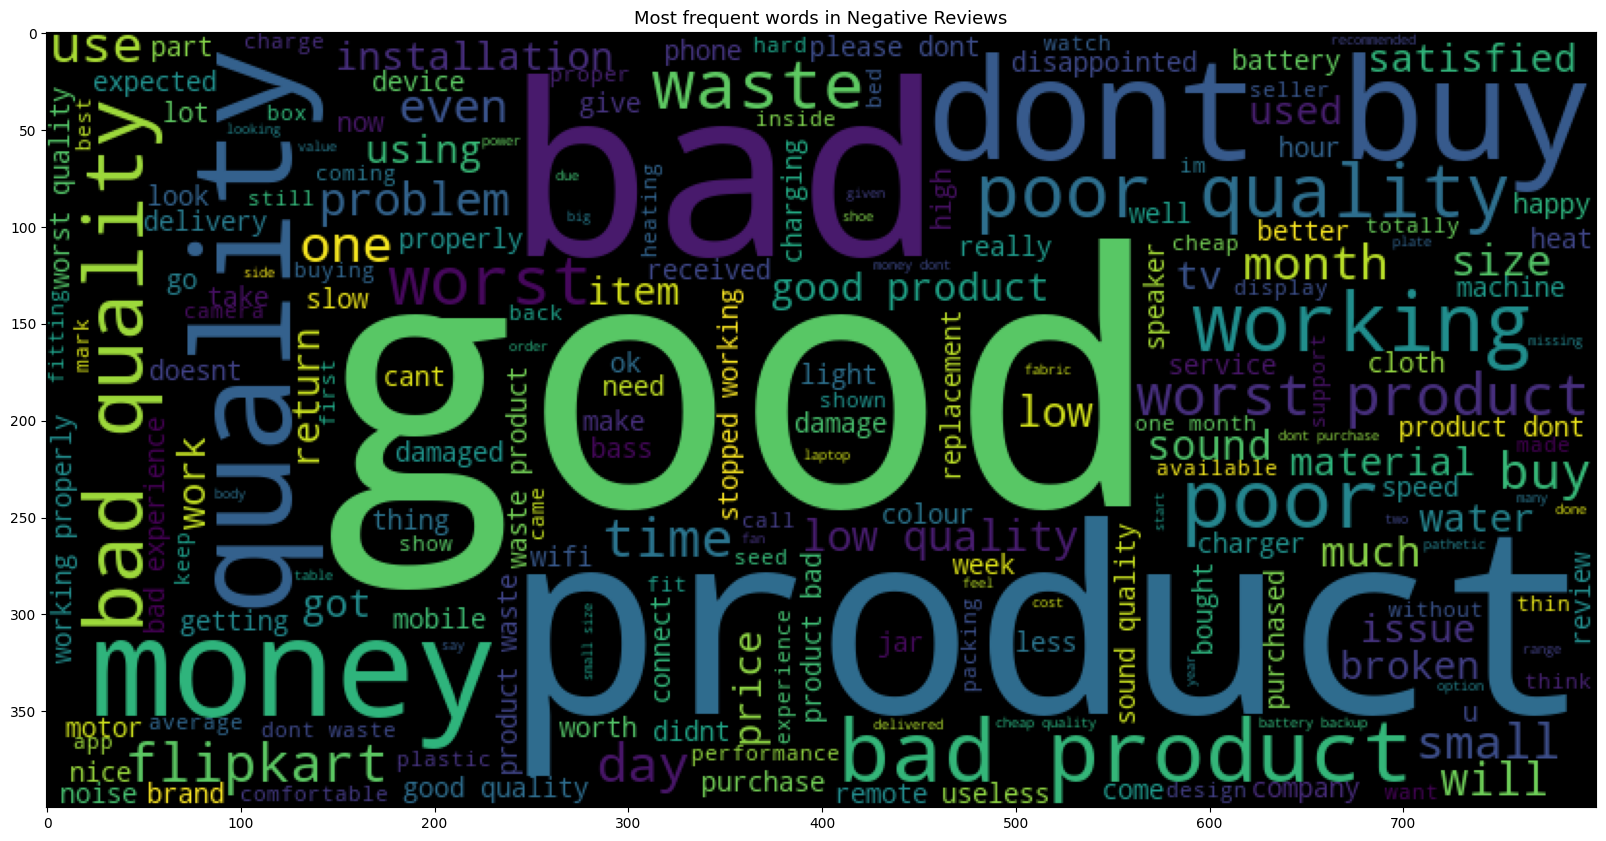

In [ ]:
#Negative words
words = ' '.join([word for word in neg['Summary']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=200, width=800, height=400).generate(words)
plt.imshow(wordcloud)
plt.title('Most frequent words in Negative Reviews', fontsize=13)
plt.show()

In [ ]:
X = df['Summary']
y = df['Sentiment']

In [ ]:
print(type(X))

<class 'pandas.core.series.Series'>


**BOW**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
bow = vec.fit_transform(X)
bow.shape

(205052, 35599)

In [ ]:
X1=bow
X1.shape

(205052, 35599)

In [ ]:
X1

<205052x35599 sparse matrix of type '<class 'numpy.int64'>'
	with 1350674 stored elements in Compressed Sparse Row format>

In [ ]:
#train test split of dataset BOW
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2)

In [ ]:
#X1_train

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(X)
print(result.shape)

(205052, 35599)


In [ ]:
X2=result
y=df['sentiment_encoded']

In [ ]:
#train test split of dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2)

**Word2vec feature extraction**

In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

ModuleNotFoundError: No module named 'gensim'

In [ ]:
X = df['Summary']
sentences = [review.split() for review in X]

In [ ]:
model = Word2Vec(sentences)

NameError: name 'Word2Vec' is not defined

In [ ]:
import scipy.sparse as sp
from scipy import sparse

#path_npz='C:\\Users\\jurir\\Desktop\\MY\\bagofword.npz'
path_npz='C:/Users/GPU_CA/Downloads/Priya/word2vec.npz'

#Load the Tf-idf sparse matrix from NPZ file
X3=sp.load_npz(path_npz)

In [ ]:
len(embedding_matrix)

205052

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y,
                                                    test_size=0.2)
X3_train.shape,X3_test.shape,y3_train.shape,y3_test.shape

((164041, 100), (41011, 100), (164041,), (41011,))

In [ ]:
negative_values = X3_train[X3_train < 0]
print(negative_values)

[[-0.7389555  -0.07093766 -0.29710937 ... -0.0198081  -0.29394093
  -0.57186675]]


In [ ]:
X3_train[X3_train < 0] = 0
print(y3_test)

129279    2
27766     0
99909     2
50775     2
50382     2
         ..
130715    2
168580    2
106187    2
105621    0
119772    2
Name: sentiment_encoded, Length: 41011, dtype: int32


**Concatenating**

In [ ]:
from scipy.sparse import hstack

In [ ]:
X_train_combined = hstack((X1_train, X2_train, X3_train))
X_test_combined = hstack((X1_test, X2_test, X3_test))

In [ ]:
X_train_combined.shape, X_test_combined.shape

((164041, 71298), (41011, 71298))

In [ ]:
from scipy import sparse
sparse.save_npz('/content/drive/MyDrive/three.npz',X_train)

In [ ]:
import scipy.sparse as sp
#File path where tfidf file is saved
#path_npz='C:/Users/GPU_CA/Downloads/Priya/tfidf.npz (2).txt.npz'
path_npz='/content/drive/MyDrive/tfidf.npz'

#Load the Tf-idf sparse matrix from NPZ file
x=sp.load_npz(path_npz)

In [ ]:
x.shape

(205052, 42370)

In [ ]:
X_train = X_train_combined
X_test = X_test_combined

In [ ]:
y_train = y1_train
y_test = y1_test

In [ ]:
df.head(10)

,Summary,Sentiment,sentiment_encoded
0,great cooler excel air flow and for thi price ...,positive,2
1,best budget fit cooler nice cool,positive,2
2,the qualiti is good but the power of air is de...,positive,2
3,veri bad product it a onli a fan,negative,0
4,ok ok product,neutral,1
5,the cooler is realli fantast and provid good a...,positive,2
6,veri good product,positive,2
7,veri nice,positive,2
8,veri bad cooler,negative,0
9,veri good,positive,2


In [ ]:
df.columns

Index(['Summary', 'Sentiment', 'sentiment_encoded'], dtype='object')

**Logistic Regression**

In [ ]:
X = df['Summary']
sentences = [review.split() for review in X]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
logpred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, logpred)

# Print results
print('Logistic Regression model accuracy :' ,str('{:04.2f}'.format(accuracy*100))+'%')
print('-------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, logpred)))
print('-------------------------------')
print(classification_report(y_test, logpred))

Logistic Regression model accuracy : 92.69%
-------------------------------
Confusion Matrix:
      0    1      2
0  4724  155    750
1   478  801    846
2   552  217  32488
-------------------------------
              precision    recall  f1-score   support

    negative       0.82      0.84      0.83      5629
     neutral       0.68      0.38      0.49      2125
    positive       0.95      0.98      0.96     33257

    accuracy                           0.93     41011
   macro avg       0.82      0.73      0.76     41011
weighted avg       0.92      0.93      0.92     41011



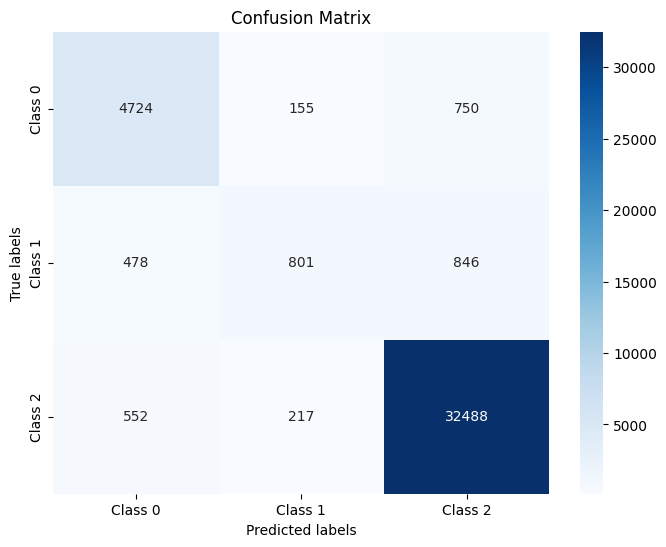

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, logpred) # Removed .argmax from y_test and logpred

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**SVC()**

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)
accuracy=metrics.accuracy_score(y_test,svcpred)
print('SVC model accuracy :' ,str('{:04.2f}'.format(accuracy*100))+'%')
print('-------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test,svcpred)))
print('-------------------------------')
print(classification_report(y_test, svcpred))

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, svcpred) # Removed .argmax from y_test and logpred

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import check_array
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
clf=MultinomialNB()
clf.fit(X_train,y_train)
clfpred=clf.predict(X_test)
accuracy=metrics.accuracy_score(y_test,clfpred)
print('Naive Bayes model accuracy :' ,str('{:04.2f}'.format(accuracy*100))+'%')
print('-------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, clfpred)))
print('-------------------------------')
print(classification_report(y_test, clfpred))

Naive Bayes model accuracy : 85.71%
-------------------------------
Confusion Matrix:
      0    1      2
0  5102   51    569
1   845  487    794
2  3274  326  29563
-------------------------------
              precision    recall  f1-score   support

    negative       0.55      0.89      0.68      5722
     neutral       0.56      0.23      0.33      2126
    positive       0.96      0.89      0.92     33163

    accuracy                           0.86     41011
   macro avg       0.69      0.67      0.64     41011
weighted avg       0.88      0.86      0.86     41011



In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, clfpred) # Removed .argmax from y_test and logpred

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Random forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn import metrics

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rfpred=rf.predict(X_test)

accuracy=metrics.accuracy_score(y_test,rfpred)
print('Random Forest model accuracy :' ,str('{:04.2f}'.format(accuracy*100))+'%')
print('-------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test,rfpred)))
print('-------------------------------')
print(classification_report(y_test, rfpred))

Random Forest model accuracy : 91.48%
-------------------------------
Confusion Matrix:
      0    1      2
0  4038   38   1646
1   288  706   1132
2   283  107  32773
-------------------------------
              precision    recall  f1-score   support

    negative       0.88      0.71      0.78      5722
     neutral       0.83      0.33      0.47      2126
    positive       0.92      0.99      0.95     33163

    accuracy                           0.91     41011
   macro avg       0.88      0.68      0.74     41011
weighted avg       0.91      0.91      0.91     41011



In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, rfpred) # Removed .argmax from y_test and logpred

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()